In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [6]:
"""
Insurance Claims Dataset - Exploratory Data Analysis
====================================================
Goal: Understand the data before building RAG retrieval system
Dataset: 58,592 insurance policies with 41 features
"""
# Load data
print("=" * 70)
print("LOADING DATA")
print("=" * 70)
df = pd.read_csv('../data/processed/cleaned_data.csv')
print(f"✓ Loaded {len(df):,} records with {len(df.columns)} columns\n")


LOADING DATA
✓ Loaded 58,592 records with 41 columns



In [9]:
# =============================================================================
# 1. BASIC OVERVIEW
# =============================================================================
print("=" * 70)
print("1. DATASET OVERVIEW")
print("=" * 70)

print("\n📊 Dataset Shape:")
print(f"   Rows: {df.shape[0]:,}")
print(f"   Columns: {df.shape[1]}")

print("\n📋 Column Data Types:")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"   {dtype}: {count} columns")

print("\n🔍 Memory Usage:")
memory_mb = df.memory_usage(deep=True).sum() / 1024**2
print(f"   {memory_mb:.2f} MB")

print("\n❓ Missing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("   ✓ No missing values!")
else:
    print(missing[missing > 0])



1. DATASET OVERVIEW

📊 Dataset Shape:
   Rows: 58,592
   Columns: 41

📋 Column Data Types:
   int64: 27 columns
   object: 11 columns
   float64: 3 columns

🔍 Memory Usage:
   48.05 MB

❓ Missing Values:
   ✓ No missing values!



2. TARGET VARIABLE: CLAIM_STATUS

📈 Claim Distribution:
   No Claim (0): 54,844 (93.60%)
   Claim (1):    3,748 (6.40%)

   ⚠️  Class Imbalance Ratio: 14.6:1
   ✓ Saved: output/01_claim_distribution.png


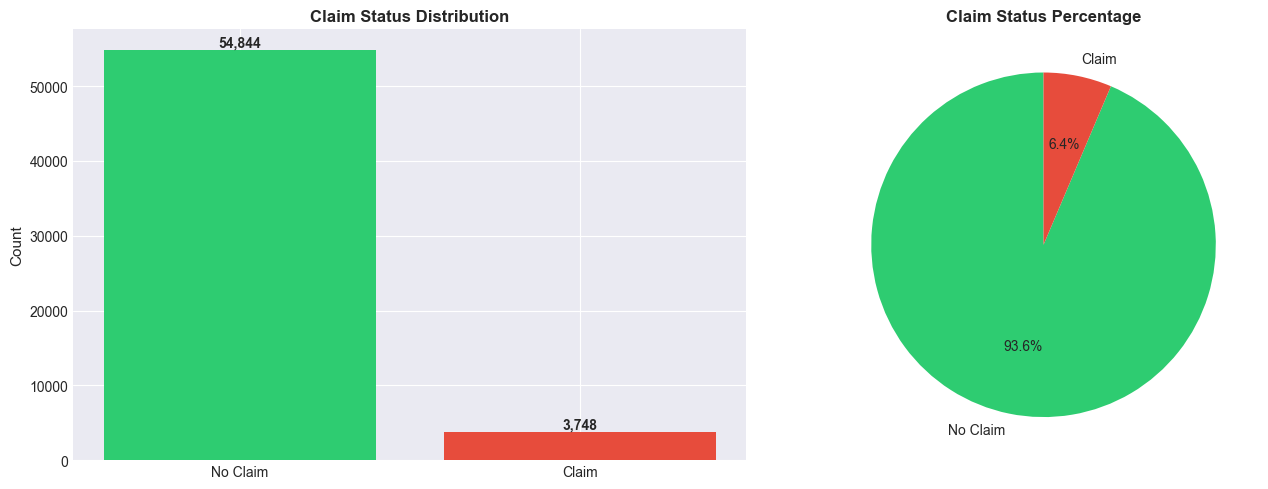

In [10]:

# =============================================================================
# 2. TARGET VARIABLE ANALYSIS
# =============================================================================
print("\n" + "=" * 70)
print("2. TARGET VARIABLE: CLAIM_STATUS")
print("=" * 70)

claim_counts = df['claim_status'].value_counts()
claim_rate = (claim_counts[1] / len(df)) * 100

print(f"\n📈 Claim Distribution:")
print(f"   No Claim (0): {claim_counts[0]:,} ({100-claim_rate:.2f}%)")
print(f"   Claim (1):    {claim_counts[1]:,} ({claim_rate:.2f}%)")
print(f"\n   ⚠️  Class Imbalance Ratio: {claim_counts[0]/claim_counts[1]:.1f}:1")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
axes[0].bar(['No Claim', 'Claim'], claim_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('Count', fontsize=11)
axes[0].set_title('Claim Status Distribution', fontsize=12, fontweight='bold')
for i, v in enumerate(claim_counts.values):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')

# Pie chart
axes[1].pie(claim_counts.values, labels=['No Claim', 'Claim'], autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Claim Status Percentage', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../output/01_claim_distribution.png', dpi=300, bbox_inches='tight')
print("   ✓ Saved: output/01_claim_distribution.png")
plt.show()



3. NUMERICAL FEATURES ANALYSIS

📊 Found 29 numerical features
   ['subscription_length', 'vehicle_age', 'customer_age', 'region_density', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'displacement', 'cylinder', 'turning_radius', 'length', 'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating']

📈 Key Statistics:
                                      mean       std     min      max  \
subscription_length                   6.11      4.14     0.0     14.0   
vehicle_age                           1.39      1.13     0.0     20.0   
customer_age                         44.82      6.94    35.0     75.0   
region_density                    18826.86  17660.17   290.0  73430.0   

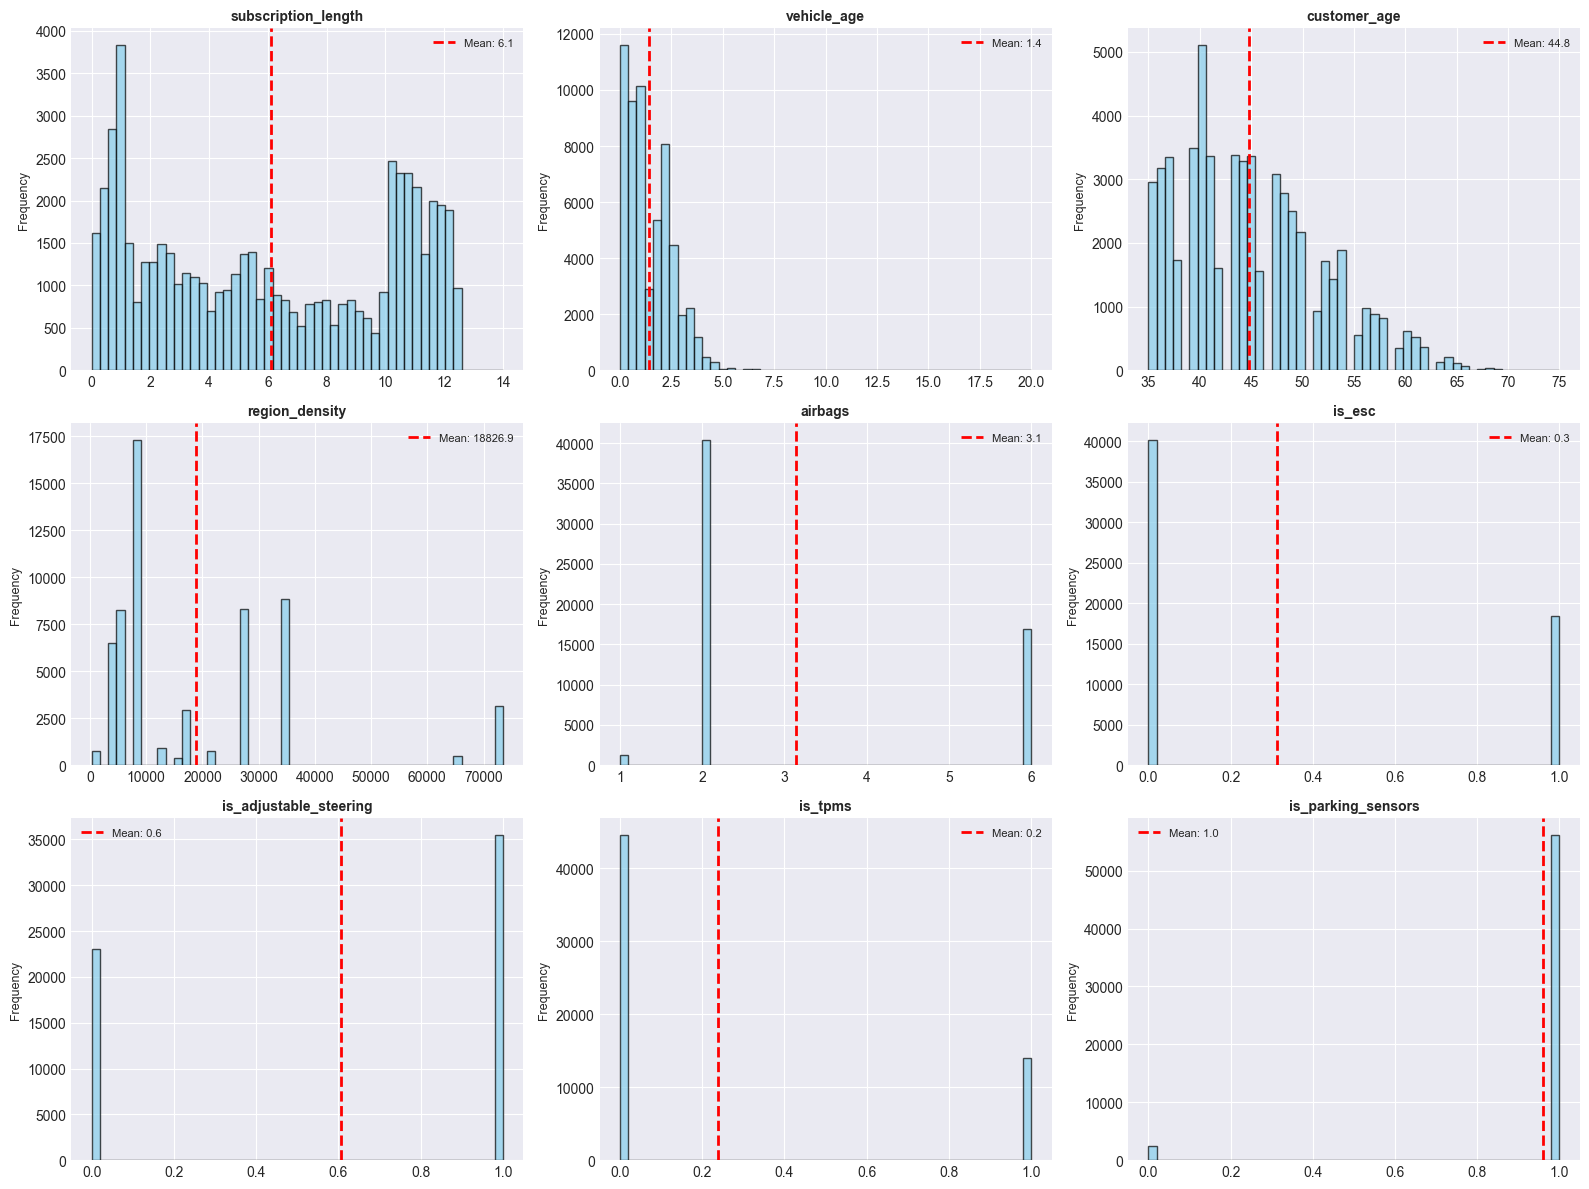

In [11]:
# =============================================================================
# 3. NUMERICAL FEATURES ANALYSIS
# =============================================================================
print("\n" + "=" * 70)
print("3. NUMERICAL FEATURES ANALYSIS")
print("=" * 70)

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('claim_status')  # Exclude target

print(f"\n📊 Found {len(numerical_cols)} numerical features")
print(f"   {numerical_cols}\n")

# Summary statistics
print("📈 Key Statistics:")
stats_df = df[numerical_cols].describe().T
stats_df['missing'] = df[numerical_cols].isnull().sum()
stats_df['skewness'] = df[numerical_cols].skew()
stats_df['kurtosis'] = df[numerical_cols].kurtosis()
print(stats_df[['mean', 'std', 'min', 'max', 'skewness']].round(2))

# Distribution plots
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:9]):
    axes[i].hist(df[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(col, fontsize=10, fontweight='bold')
    axes[i].set_ylabel('Frequency', fontsize=9)
    
    # Add mean line
    mean_val = df[col].mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    axes[i].legend(fontsize=8)

plt.tight_layout()
plt.savefig('../output/02_numerical_distributions.png', dpi=300, bbox_inches='tight')
print("\n   ✓ Saved: output/02_numerical_distributions.png")
plt.show()



4. CATEGORICAL FEATURES ANALYSIS

📊 Found 11 categorical features

📋 Cardinality (unique values):
   policy_id                     : 58592 unique values
   region_code                   :   22 unique values
   segment                       :    6 unique values
   model                         :   11 unique values
   fuel_type                     :    3 unique values
   max_torque                    :    9 unique values
   max_power                     :    9 unique values
   engine_type                   :   11 unique values
   rear_brakes_type              :    2 unique values
   transmission_type             :    2 unique values

🔥 Claim Rates by Category (Top Features):

   SEGMENT:
         claims  total  claim_rate
segment                           
B2         1256  18314    0.068581
C2          901  14018    0.064275
C1          228   3557    0.064099

   FUEL_TYPE:
           claims  total  claim_rate
fuel_type                           
Petrol       1363  20532    0.066384
Die

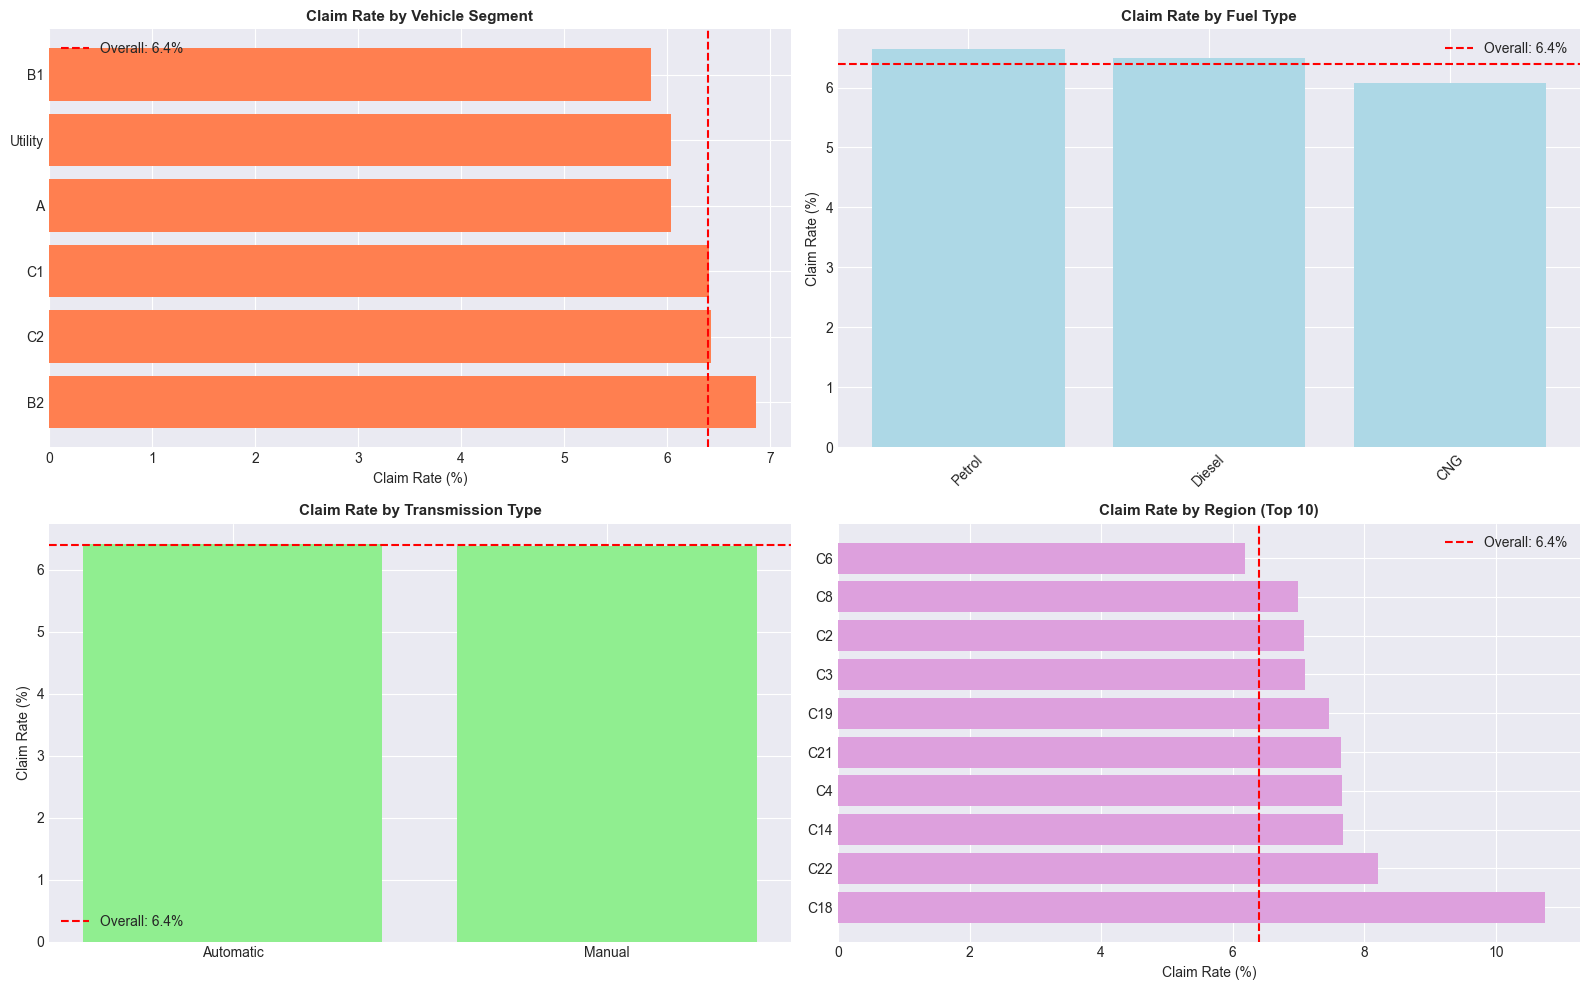

In [12]:
# =============================================================================
# 4. CATEGORICAL FEATURES ANALYSIS
# =============================================================================
print("\n" + "=" * 70)
print("4. CATEGORICAL FEATURES ANALYSIS")
print("=" * 70)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\n📊 Found {len(categorical_cols)} categorical features\n")

print("📋 Cardinality (unique values):")
for col in categorical_cols[:10]:  # Show first 10
    n_unique = df[col].nunique()
    print(f"   {col:30s}: {n_unique:4d} unique values")

# Top categorical features by claim rate
print("\n🔥 Claim Rates by Category (Top Features):")

key_categoricals = ['segment', 'fuel_type', 'region_code', 'transmission_type', 'steering_type']
for col in key_categoricals:
    if col in df.columns:
        claim_by_cat = df.groupby(col)['claim_status'].agg(['sum', 'count', 'mean'])
        claim_by_cat.columns = ['claims', 'total', 'claim_rate']
        claim_by_cat = claim_by_cat.sort_values('claim_rate', ascending=False)
        print(f"\n   {col.upper()}:")
        print(claim_by_cat.head(3).to_string())

# Visualize key categorical features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Segment
seg_claims = df.groupby('segment')['claim_status'].mean().sort_values(ascending=False)
axes[0, 0].barh(seg_claims.index, seg_claims.values * 100, color='coral')
axes[0, 0].set_xlabel('Claim Rate (%)', fontsize=10)
axes[0, 0].set_title('Claim Rate by Vehicle Segment', fontsize=11, fontweight='bold')
axes[0, 0].axvline(claim_rate, color='red', linestyle='--', label=f'Overall: {claim_rate:.1f}%')
axes[0, 0].legend()

# Fuel Type
fuel_claims = df.groupby('fuel_type')['claim_status'].mean().sort_values(ascending=False)
axes[0, 1].bar(fuel_claims.index, fuel_claims.values * 100, color='lightblue')
axes[0, 1].set_ylabel('Claim Rate (%)', fontsize=10)
axes[0, 1].set_title('Claim Rate by Fuel Type', fontsize=11, fontweight='bold')
axes[0, 1].axhline(claim_rate, color='red', linestyle='--', label=f'Overall: {claim_rate:.1f}%')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# Transmission Type
trans_claims = df.groupby('transmission_type')['claim_status'].mean().sort_values(ascending=False)
axes[1, 0].bar(trans_claims.index, trans_claims.values * 100, color='lightgreen')
axes[1, 0].set_ylabel('Claim Rate (%)', fontsize=10)
axes[1, 0].set_title('Claim Rate by Transmission Type', fontsize=11, fontweight='bold')
axes[1, 0].axhline(claim_rate, color='red', linestyle='--', label=f'Overall: {claim_rate:.1f}%')
axes[1, 0].legend()

# Region (top 10)
region_claims = df.groupby('region_code')['claim_status'].mean().sort_values(ascending=False).head(10)
axes[1, 1].barh(region_claims.index, region_claims.values * 100, color='plum')
axes[1, 1].set_xlabel('Claim Rate (%)', fontsize=10)
axes[1, 1].set_title('Claim Rate by Region (Top 10)', fontsize=11, fontweight='bold')
axes[1, 1].axvline(claim_rate, color='red', linestyle='--', label=f'Overall: {claim_rate:.1f}%')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('../output/03_categorical_claim_rates.png', dpi=300, bbox_inches='tight')
print("\n   ✓ Saved: output/03_categorical_claim_rates.png")
plt.show()



5. FEATURE RELATIONSHIPS WITH CLAIMS

📊 Numerical Features vs Claims (Statistical Tests):
Feature                        No Claim Mean   Claim Mean      Difference   P-value
-------------------------------------------------------------------------------------
subscription_length            6.03            7.36            1.33         0.0000
vehicle_age                    1.40            1.27            -0.13        0.0000
customer_age                   44.78           45.41           0.63         0.0000
region_density                 18909.07        17623.82        -1285.25     0.0000
airbags                        3.14            3.16            0.02         0.4997
is_esc                         0.31            0.32            0.01         0.4685
is_adjustable_steering         0.60            0.63            0.03         0.0008
is_tpms                        0.24            0.24            0.00         0.8649
is_parking_sensors             0.96            0.97            0.01        

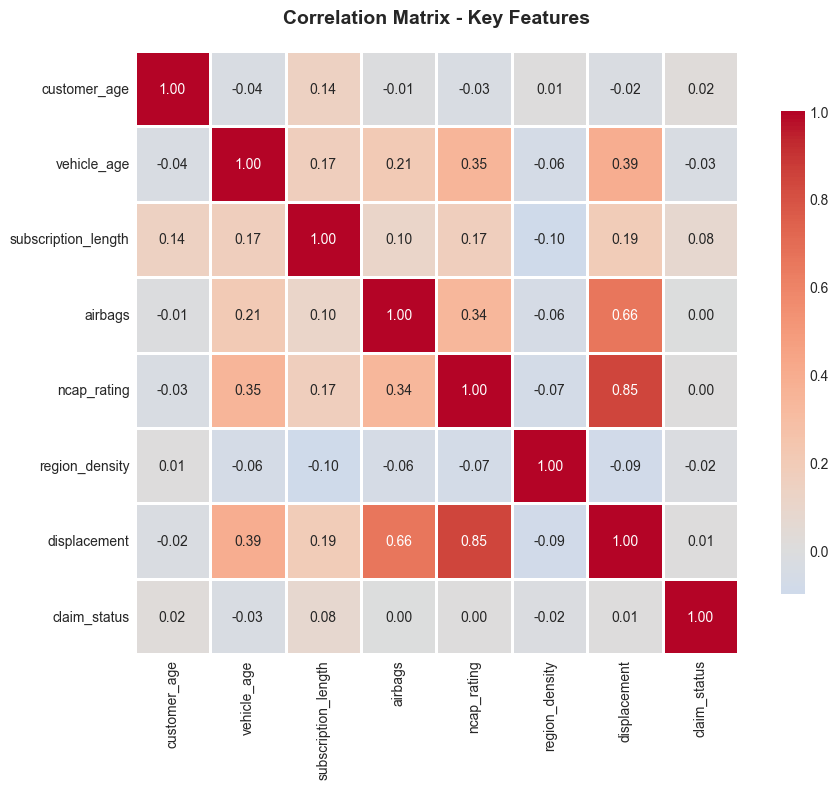

In [13]:

# =============================================================================
# 5. FEATURE RELATIONSHIPS WITH CLAIMS
# =============================================================================
print("\n" + "=" * 70)
print("5. FEATURE RELATIONSHIPS WITH CLAIMS")
print("=" * 70)

print("\n📊 Numerical Features vs Claims (Statistical Tests):")
print(f"{'Feature':<30} {'No Claim Mean':<15} {'Claim Mean':<15} {'Difference':<12} {'P-value'}")
print("-" * 85)

for col in numerical_cols[:10]:
    no_claim = df[df['claim_status'] == 0][col]
    claim = df[df['claim_status'] == 1][col]
    
    # T-test
    t_stat, p_value = stats.ttest_ind(no_claim, claim)
    
    print(f"{col:<30} {no_claim.mean():<15.2f} {claim.mean():<15.2f} {(claim.mean() - no_claim.mean()):<12.2f} {p_value:.4f}")

# Correlation with claims
print("\n📈 Correlation with Claim Status (Top 10):")
correlations = df[numerical_cols].corrwith(df['claim_status']).abs().sort_values(ascending=False)
print(correlations.head(10).to_string())

# Correlation heatmap (key features)
key_features = ['customer_age', 'vehicle_age', 'subscription_length', 'airbags', 
                'ncap_rating', 'region_density', 'displacement', 'claim_status']
corr_matrix = df[key_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Key Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../output/04_correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("\n   ✓ Saved: output/04_correlation_heatmap.png")
plt.show()



6. SAFETY FEATURES ANALYSIS

🛡️ Safety Feature Claim Rates:

   IS_ESC:
      With feature:    6.51%
      Without feature: 6.35%
      Difference:      +0.16%

   IS_BRAKE_ASSIST:
      With feature:    6.64%
      Without feature: 6.10%
      Difference:      +0.54%

   IS_PARKING_SENSORS:
      With feature:    6.44%
      Without feature: 5.39%
      Difference:      +1.05%

   IS_PARKING_CAMERA:
      With feature:    6.37%
      Without feature: 6.41%
      Difference:      -0.04%

   IS_TPMS:
      With feature:    6.43%
      Without feature: 6.39%
      Difference:      +0.04%

   AIRBAGS:
airbags
1    6.038048
2    6.364873
6    6.498408

   NCAP_RATING:
ncap_rating
0    6.241818
2    6.499393
3    6.427450
4    6.291391
5    6.680265

   ✓ Saved: output/05_safety_features.png


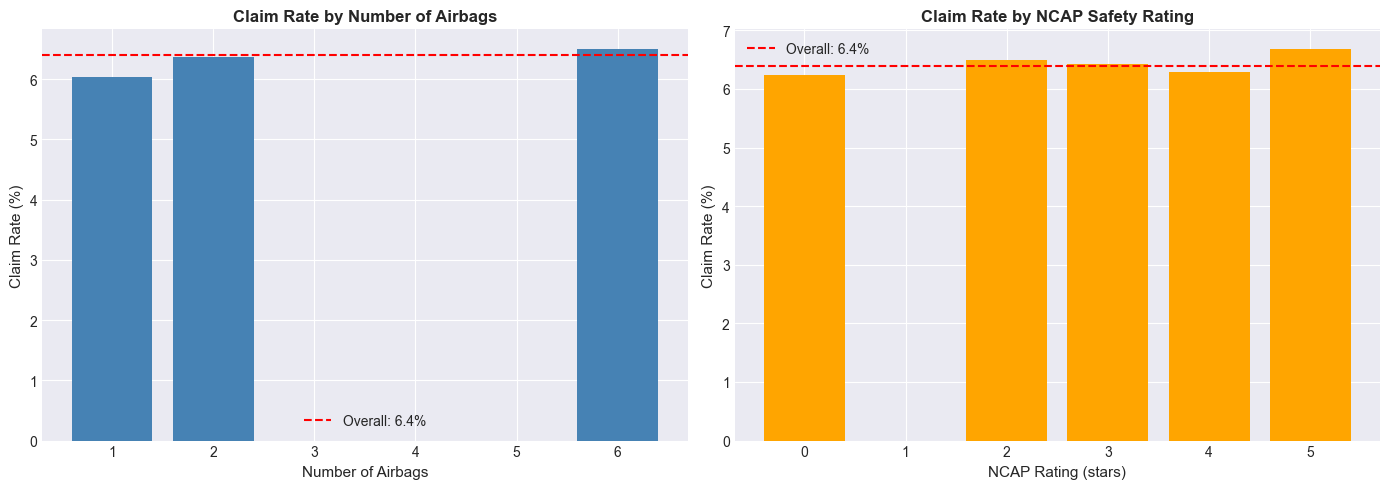

In [14]:
# =============================================================================
# 6. SAFETY FEATURES ANALYSIS
# =============================================================================
print("\n" + "=" * 70)
print("6. SAFETY FEATURES ANALYSIS")
print("=" * 70)

safety_features = ['is_esc', 'is_brake_assist', 'is_parking_sensors', 'is_parking_camera',
                  'is_tpms', 'airbags', 'ncap_rating']

print("\n🛡️ Safety Feature Claim Rates:")
for feature in safety_features:
    if feature in df.columns:
        if feature in ['airbags', 'ncap_rating']:
            claim_by_safety = df.groupby(feature)['claim_status'].mean() * 100
            print(f"\n   {feature.upper()}:")
            print(claim_by_safety.to_string())
        else:
            has_feature = df[df[feature] == 1]['claim_status'].mean() * 100
            no_feature = df[df[feature] == 0]['claim_status'].mean() * 100
            print(f"\n   {feature.upper()}:")
            print(f"      With feature:    {has_feature:.2f}%")
            print(f"      Without feature: {no_feature:.2f}%")
            print(f"      Difference:      {has_feature - no_feature:+.2f}%")

# Visualize airbags and NCAP rating
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Airbags
airbag_claim = df.groupby('airbags')['claim_status'].agg(['mean', 'count'])
axes[0].bar(airbag_claim.index, airbag_claim['mean'] * 100, color='steelblue')
axes[0].set_xlabel('Number of Airbags', fontsize=11)
axes[0].set_ylabel('Claim Rate (%)', fontsize=11)
axes[0].set_title('Claim Rate by Number of Airbags', fontsize=12, fontweight='bold')
axes[0].axhline(claim_rate, color='red', linestyle='--', label=f'Overall: {claim_rate:.1f}%')
axes[0].legend()

# NCAP Rating
ncap_claim = df.groupby('ncap_rating')['claim_status'].agg(['mean', 'count'])
axes[1].bar(ncap_claim.index, ncap_claim['mean'] * 100, color='orange')
axes[1].set_xlabel('NCAP Rating (stars)', fontsize=11)
axes[1].set_ylabel('Claim Rate (%)', fontsize=11)
axes[1].set_title('Claim Rate by NCAP Safety Rating', fontsize=12, fontweight='bold')
axes[1].axhline(claim_rate, color='red', linestyle='--', label=f'Overall: {claim_rate:.1f}%')
axes[1].legend()

plt.tight_layout()
plt.savefig('../output/05_safety_features.png', dpi=300, bbox_inches='tight')
print("\n   ✓ Saved: output/05_safety_features.png")
plt.show()



7. AGE ANALYSIS - CUSTOMER & VEHICLE

👤 Customer Age:
   Range: 35 - 75 years
   Mean: 44.8 years
   Median: 44.0 years

🚗 Vehicle Age:
   Range: 0.0 - 20.0 years
   Mean: 1.4 years
   Median: 1.2 years

📊 Claim Rates by Age Groups:

   Customer Age Groups:
customer_age_bin
18-25         NaN
26-35    5.900305
36-45    6.121168
46-55    6.630872
56+      7.541302

   Vehicle Age Groups:
vehicle_age_bin
0-3 yrs    6.120362
4-7 yrs    4.462061
8+ yrs     0.000000



   ✓ Saved: output/06_age_distributions.png


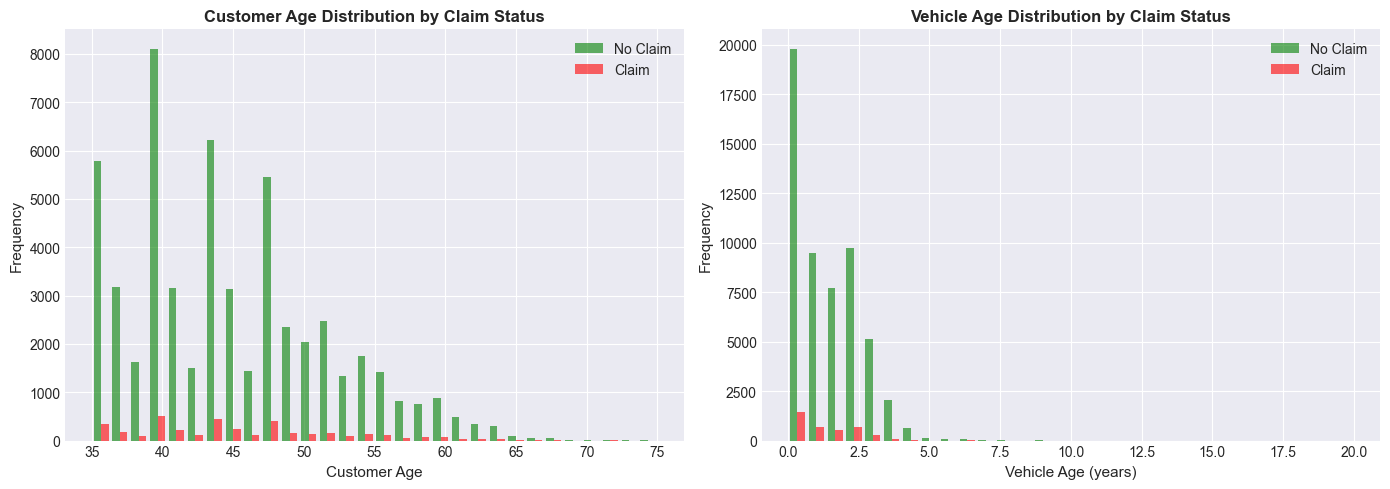

In [15]:
# =============================================================================
# 7. AGE ANALYSIS (CUSTOMER & VEHICLE)
# =============================================================================
print("\n" + "=" * 70)
print("7. AGE ANALYSIS - CUSTOMER & VEHICLE")
print("=" * 70)

print("\n👤 Customer Age:")
print(f"   Range: {df['customer_age'].min()} - {df['customer_age'].max()} years")
print(f"   Mean: {df['customer_age'].mean():.1f} years")
print(f"   Median: {df['customer_age'].median():.1f} years")

print("\n🚗 Vehicle Age:")
print(f"   Range: {df['vehicle_age'].min():.1f} - {df['vehicle_age'].max():.1f} years")
print(f"   Mean: {df['vehicle_age'].mean():.1f} years")
print(f"   Median: {df['vehicle_age'].median():.1f} years")

# Age bins for analysis
df['customer_age_bin'] = pd.cut(df['customer_age'], bins=[0, 25, 35, 45, 55, 100],
                                 labels=['18-25', '26-35', '36-45', '46-55', '56+'])
df['vehicle_age_bin'] = pd.cut(df['vehicle_age'], bins=[0, 3, 7, 15],
                               labels=['0-3 yrs', '4-7 yrs', '8+ yrs'])

print("\n📊 Claim Rates by Age Groups:")
print("\n   Customer Age Groups:")
print((df.groupby('customer_age_bin')['claim_status'].mean() * 100).to_string())

print("\n   Vehicle Age Groups:")
print((df.groupby('vehicle_age_bin')['claim_status'].mean() * 100).to_string())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Customer age distribution by claim
axes[0].hist([df[df['claim_status']==0]['customer_age'], 
              df[df['claim_status']==1]['customer_age']],
             bins=30, label=['No Claim', 'Claim'], color=['green', 'red'], alpha=0.6)
axes[0].set_xlabel('Customer Age', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Customer Age Distribution by Claim Status', fontsize=12, fontweight='bold')
axes[0].legend()

# Vehicle age distribution by claim
axes[1].hist([df[df['claim_status']==0]['vehicle_age'], 
              df[df['claim_status']==1]['vehicle_age']],
             bins=30, label=['No Claim', 'Claim'], color=['green', 'red'], alpha=0.6)
axes[1].set_xlabel('Vehicle Age (years)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Vehicle Age Distribution by Claim Status', fontsize=12, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.savefig('../output/06_age_distributions.png', dpi=300, bbox_inches='tight')
print("\n   ✓ Saved: output/06_age_distributions.png")
plt.show()


In [16]:
# =============================================================================
# 8. KEY INSIGHTS SUMMARY
# =============================================================================
print("\n" + "=" * 70)
print("8. KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 70)

print("\n🎯 KEY FINDINGS:\n")

print("1. CLASS IMBALANCE:")
print(f"   • Severe imbalance: {claim_counts[0]/claim_counts[1]:.1f}:1 ratio")
print("   • Only 6.4% of policies have claims")
print("   • Recommendation: Use SMOTE, class weights, or stratified sampling\n")

print("2. HIGH-RISK PROFILES:")
# Find highest risk combinations
young_old_vehicle = df[(df['customer_age'] < 26) & (df['vehicle_age'] > 7)]


8. KEY INSIGHTS & RECOMMENDATIONS

🎯 KEY FINDINGS:

1. CLASS IMBALANCE:
   • Severe imbalance: 14.6:1 ratio
   • Only 6.4% of policies have claims
   • Recommendation: Use SMOTE, class weights, or stratified sampling

2. HIGH-RISK PROFILES:



## Advanced EDA - Class Imbalance Analysis for Insurance Claims
============================================================
- **Focus:** Understanding the 6.4% claim rate and its implications for RAG
- **Goal:** Demonstrate why standard approaches fail and justify dual-index system
"""


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Enhanced plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10


1. CLASS IMBALANCE SEVERITY ASSESSMENT

📊 RAW DISTRIBUTION:
   No Claim (0): 54,844 records (93.60%)
   Claim (1):    3,748 records (6.40%)

⚖️  IMBALANCE METRICS:
   Imbalance Ratio: 14.63:1
   Minority Class %: 6.40%
   Majority Class %: 93.60%

🎯 CLASSIFICATION DIFFICULTY: MODERATE (5-20%)
   Note: Below 10% is considered highly imbalanced

   ✓ Saved: output/07_imbalance_severity.png


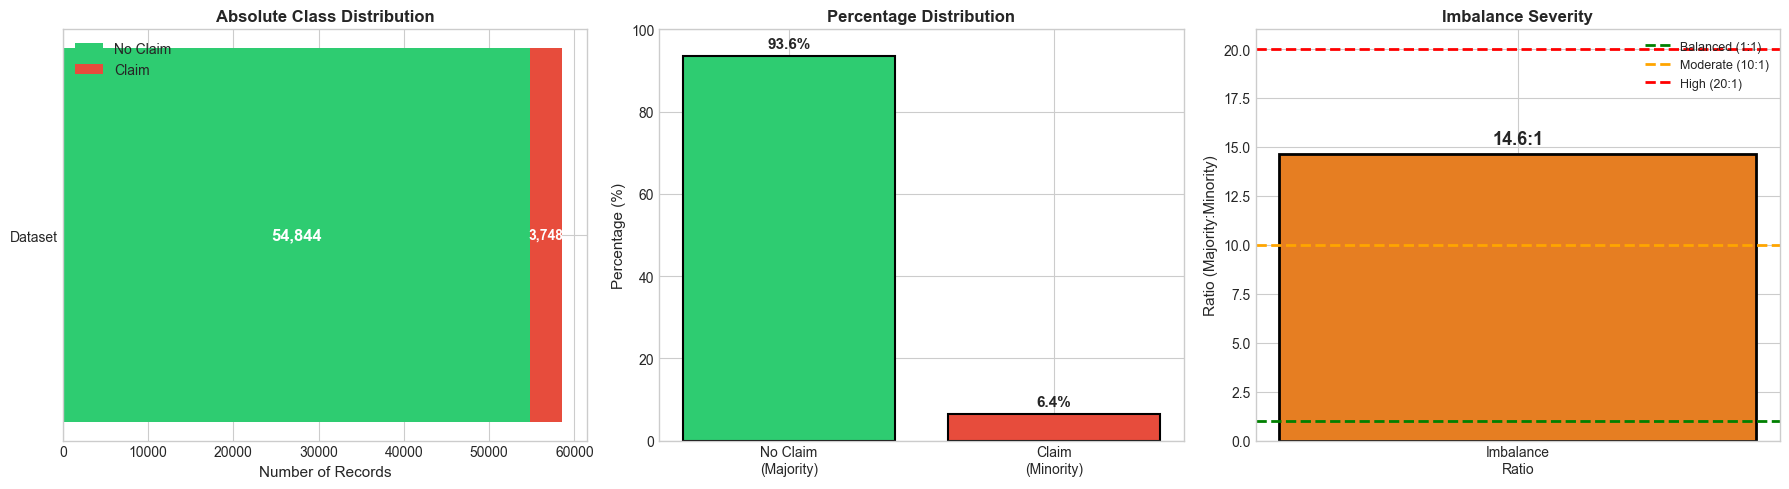

In [18]:
# =============================================================================
# 1. DETAILED CLASS IMBALANCE METRICS
# =============================================================================
print("=" * 80)
print("1. CLASS IMBALANCE SEVERITY ASSESSMENT")
print("=" * 80)

claim_counts = df['claim_status'].value_counts()
no_claim = claim_counts[0]
claim = claim_counts[1]
total = len(df)

print(f"\n📊 RAW DISTRIBUTION:")
print(f"   No Claim (0): {no_claim:,} records ({no_claim/total*100:.2f}%)")
print(f"   Claim (1):    {claim:,} records ({claim/total*100:.2f}%)")

print(f"\n⚖️  IMBALANCE METRICS:")
imbalance_ratio = no_claim / claim
print(f"   Imbalance Ratio: {imbalance_ratio:.2f}:1")
print(f"   Minority Class %: {claim/total*100:.2f}%")
print(f"   Majority Class %: {no_claim/total*100:.2f}%")

# Classification difficulty
minority_pct = claim/total*100
if minority_pct < 1:
    difficulty = "SEVERE (< 1%)"
elif minority_pct < 5:
    difficulty = "HIGH (1-5%)"
elif minority_pct < 20:
    difficulty = "MODERATE (5-20%)"
else:
    difficulty = "MILD (> 20%)"

print(f"\n🎯 CLASSIFICATION DIFFICULTY: {difficulty}")
print(f"   Note: Below 10% is considered highly imbalanced")

# Visualize imbalance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Stacked bar showing scale
axes[0].barh(['Dataset'], [no_claim], color='#2ecc71', label='No Claim')
axes[0].barh(['Dataset'], [claim], left=[no_claim], color='#e74c3c', label='Claim')
axes[0].set_xlabel('Number of Records', fontsize=11)
axes[0].set_title('Absolute Class Distribution', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].text(no_claim/2, 0, f'{no_claim:,}', ha='center', va='center', 
             fontweight='bold', color='white', fontsize=12)
axes[0].text(no_claim + claim/2, 0, f'{claim:,}', ha='center', va='center',
             fontweight='bold', color='white', fontsize=10)

# Percentage comparison
categories = ['No Claim\n(Majority)', 'Claim\n(Minority)']
percentages = [no_claim/total*100, claim/total*100]
colors = ['#2ecc71', '#e74c3c']
axes[1].bar(categories, percentages, color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Percentage (%)', fontsize=11)
axes[1].set_title('Percentage Distribution', fontsize=12, fontweight='bold')
axes[1].set_ylim([0, 100])
for i, (cat, pct) in enumerate(zip(categories, percentages)):
    axes[1].text(i, pct + 2, f'{pct:.1f}%', ha='center', fontweight='bold', fontsize=11)

# Imbalance ratio visualization
axes[2].bar(['Imbalance\nRatio'], [imbalance_ratio], color='#e67e22', edgecolor='black', linewidth=2)
axes[2].axhline(y=1, color='green', linestyle='--', linewidth=2, label='Balanced (1:1)')
axes[2].axhline(y=10, color='orange', linestyle='--', linewidth=2, label='Moderate (10:1)')
axes[2].axhline(y=20, color='red', linestyle='--', linewidth=2, label='High (20:1)')
axes[2].set_ylabel('Ratio (Majority:Minority)', fontsize=11)
axes[2].set_title('Imbalance Severity', fontsize=12, fontweight='bold')
axes[2].legend(loc='upper right', fontsize=9)
axes[2].text(0, imbalance_ratio + 0.5, f'{imbalance_ratio:.1f}:1', 
             ha='center', fontweight='bold', fontsize=13)

plt.tight_layout()
plt.savefig('../output/07_imbalance_severity.png', dpi=300, bbox_inches='tight')
print("\n   ✓ Saved: output/07_imbalance_severity.png")
plt.show()


2. RANDOM SAMPLING PROBABILITY ANALYSIS

🎲 IF WE RANDOMLY SAMPLE 5 CASES (typical RAG k=5):
   P(All 5 are no-claim) = 71.85%
   P(At least 1 claim) = 28.15%
   P(At least 2 claims) = 3.59%

🎲 IF WE RANDOMLY SAMPLE 10 CASES:
   P(All 10 are no-claim) = 51.63%
   P(At least 1 claim) = 48.37%

⚠️  IMPLICATIONS FOR RAG:
   • Standard similarity search will almost always return no-claim cases
   • Risk assessment will be biased toward 'LOW RISK'
   • True high-risk cases will be missed
   • This is why we need DUAL-INDEX approach!

   ✓ Saved: output/08_sampling_bias.png


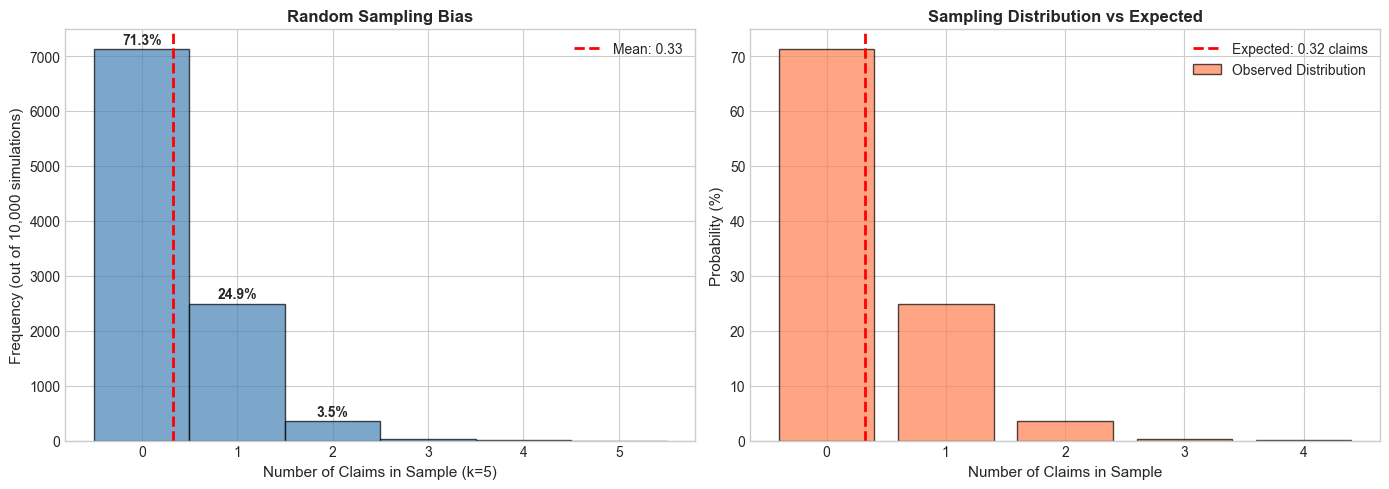

In [19]:

# =============================================================================
# 2. SAMPLING PROBABILITY ANALYSIS
# =============================================================================
print("\n" + "=" * 80)
print("2. RANDOM SAMPLING PROBABILITY ANALYSIS")
print("=" * 80)

print("\n🎲 IF WE RANDOMLY SAMPLE 5 CASES (typical RAG k=5):")
print(f"   P(All 5 are no-claim) = {(no_claim/total)**5 * 100:.2f}%")
print(f"   P(At least 1 claim) = {(1 - (no_claim/total)**5) * 100:.2f}%")
print(f"   P(At least 2 claims) = {(1 - (no_claim/total)**5 - 5*(claim/total)*(no_claim/total)**4) * 100:.2f}%")

print("\n🎲 IF WE RANDOMLY SAMPLE 10 CASES:")
print(f"   P(All 10 are no-claim) = {(no_claim/total)**10 * 100:.2f}%")
print(f"   P(At least 1 claim) = {(1 - (no_claim/total)**10) * 100:.2f}%")

print("\n⚠️  IMPLICATIONS FOR RAG:")
print("   • Standard similarity search will almost always return no-claim cases")
print("   • Risk assessment will be biased toward 'LOW RISK'")
print("   • True high-risk cases will be missed")
print("   • This is why we need DUAL-INDEX approach!\n")

# Simulate sampling
n_simulations = 10000
sample_size = 5
results = []

for _ in range(n_simulations):
    sample = df.sample(sample_size)
    n_claims = sample['claim_status'].sum()
    results.append(n_claims)

results = pd.Series(results)

# Visualize sampling distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of claims in samples
axes[0].hist(results, bins=np.arange(-0.5, sample_size + 1.5, 1), 
             color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Claims in Sample (k=5)', fontsize=11)
axes[0].set_ylabel('Frequency (out of 10,000 simulations)', fontsize=11)
axes[0].set_title('Random Sampling Bias', fontsize=12, fontweight='bold')
axes[0].axvline(results.mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {results.mean():.2f}')
axes[0].legend()

# Add percentage labels
for i in range(sample_size + 1):
    count = (results == i).sum()
    pct = count / n_simulations * 100
    if pct > 1:  # Only label if > 1%
        axes[0].text(i, count + 100, f'{pct:.1f}%', ha='center', fontweight='bold')

# Expected vs observed
expected_claims = sample_size * (claim/total)
observed_dist = results.value_counts().sort_index() / n_simulations * 100

axes[1].bar(observed_dist.index, observed_dist.values, color='coral', 
            edgecolor='black', alpha=0.7, label='Observed Distribution')
axes[1].axvline(expected_claims, color='red', linestyle='--', linewidth=2,
                label=f'Expected: {expected_claims:.2f} claims')
axes[1].set_xlabel('Number of Claims in Sample', fontsize=11)
axes[1].set_ylabel('Probability (%)', fontsize=11)
axes[1].set_title('Sampling Distribution vs Expected', fontsize=12, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.savefig('../output/08_sampling_bias.png', dpi=300, bbox_inches='tight')
print("   ✓ Saved: output/08_sampling_bias.png")
plt.show()


3. COMPARING FEATURE DISTRIBUTIONS BETWEEN CLASSES

CUSTOMER_AGE:
   No Claim - Mean: 44.78, Std: 6.92
   Claim    - Mean: 45.41, Std: 7.13
   Difference: 0.63
   KS Test: stat=0.041, p=0.0000 ***

VEHICLE_AGE:
   No Claim - Mean: 1.40, Std: 1.14
   Claim    - Mean: 1.27, Std: 1.06
   Difference: -0.13
   KS Test: stat=0.063, p=0.0000 ***

AIRBAGS:
   No Claim - Mean: 3.14, Std: 1.83
   Claim    - Mean: 3.16, Std: 1.84
   Difference: 0.02
   KS Test: stat=0.005, p=1.0000 ns

NCAP_RATING:
   No Claim - Mean: 1.76, Std: 1.39
   Claim    - Mean: 1.78, Std: 1.39
   Difference: 0.02
   KS Test: stat=0.008, p=0.9624 ns

DISPLACEMENT:
   No Claim - Mean: 1161.82, Std: 266.46
   Claim    - Mean: 1170.18, Std: 263.94
   Difference: 8.36
   KS Test: stat=0.025, p=0.0209 *

REGION_DENSITY:
   No Claim - Mean: 18909.07, Std: 17757.09
   Claim    - Mean: 17623.82, Std: 16130.13
   Difference: -1285.25
   KS Test: stat=0.032, p=0.0012 **

   ✓ Saved: output/09_feature_distributions_by_class.png


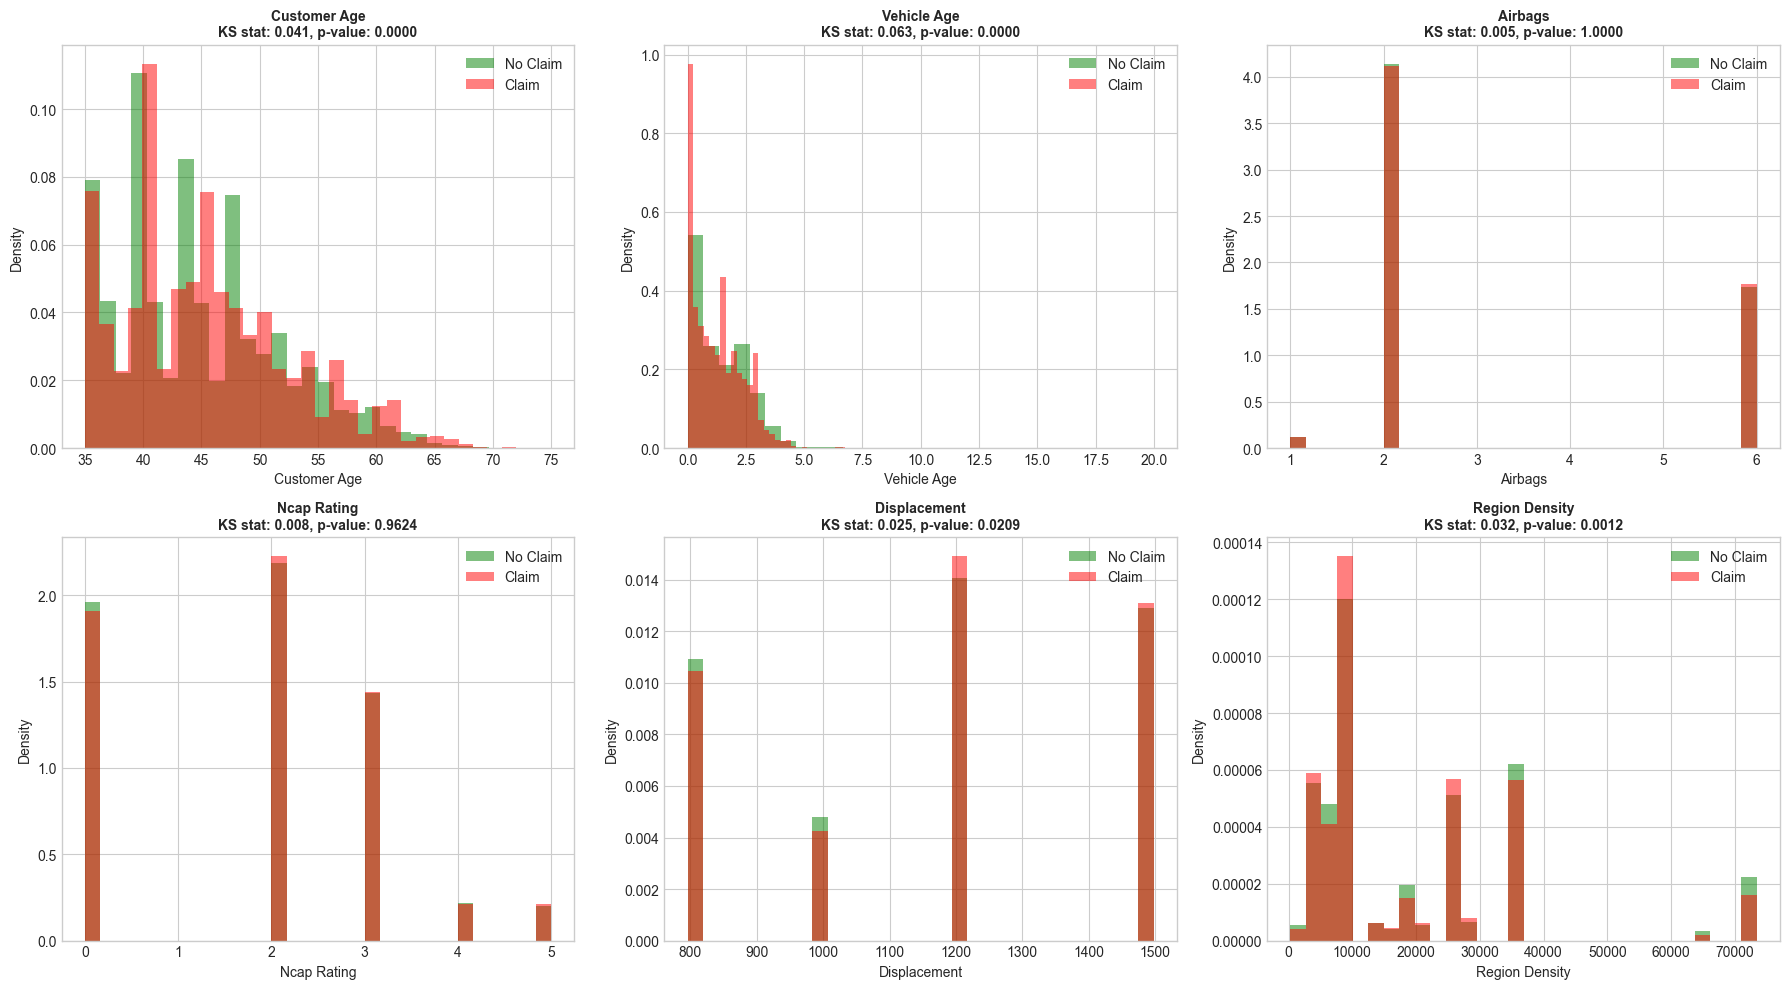

In [20]:
# =============================================================================
# 3. FEATURE DISTRIBUTION: CLAIMS vs NO-CLAIMS
# =============================================================================
print("\n" + "=" * 80)
print("3. COMPARING FEATURE DISTRIBUTIONS BETWEEN CLASSES")
print("=" * 80)

# Key numerical features
key_features = ['customer_age', 'vehicle_age', 'airbags', 'ncap_rating', 
                'displacement', 'region_density']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    # Separate by claim status
    no_claim_vals = df[df['claim_status'] == 0][feature]
    claim_vals = df[df['claim_status'] == 1][feature]
    
    # KS test for distribution difference
    ks_stat, p_value = stats.ks_2samp(no_claim_vals, claim_vals)
    
    # Plot distributions
    axes[i].hist(no_claim_vals, bins=30, alpha=0.5, label='No Claim', 
                 color='green', density=True)
    axes[i].hist(claim_vals, bins=30, alpha=0.5, label='Claim', 
                 color='red', density=True)
    
    axes[i].set_xlabel(feature.replace('_', ' ').title(), fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].set_title(f'{feature.replace("_", " ").title()}\nKS stat: {ks_stat:.3f}, p-value: {p_value:.4f}',
                      fontsize=10, fontweight='bold')
    axes[i].legend()
    
    # Add statistical info
    print(f"\n{feature.upper()}:")
    print(f"   No Claim - Mean: {no_claim_vals.mean():.2f}, Std: {no_claim_vals.std():.2f}")
    print(f"   Claim    - Mean: {claim_vals.mean():.2f}, Std: {claim_vals.std():.2f}")
    print(f"   Difference: {claim_vals.mean() - no_claim_vals.mean():.2f}")
    print(f"   KS Test: stat={ks_stat:.3f}, p={p_value:.4f} {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'ns'}")

plt.tight_layout()
plt.savefig('../output/09_feature_distributions_by_class.png', dpi=300, bbox_inches='tight')
print("\n   ✓ Saved: output/09_feature_distributions_by_class.png")
plt.show()


4. VISUALIZING CLASS OVERLAP IN FEATURE SPACE

📊 PCA Results:
   PC1 explains 55.0% of variance
   PC2 explains 9.7% of variance
   Total: 64.7%
   ✓ Saved: output/10_pca_class_overlap.png


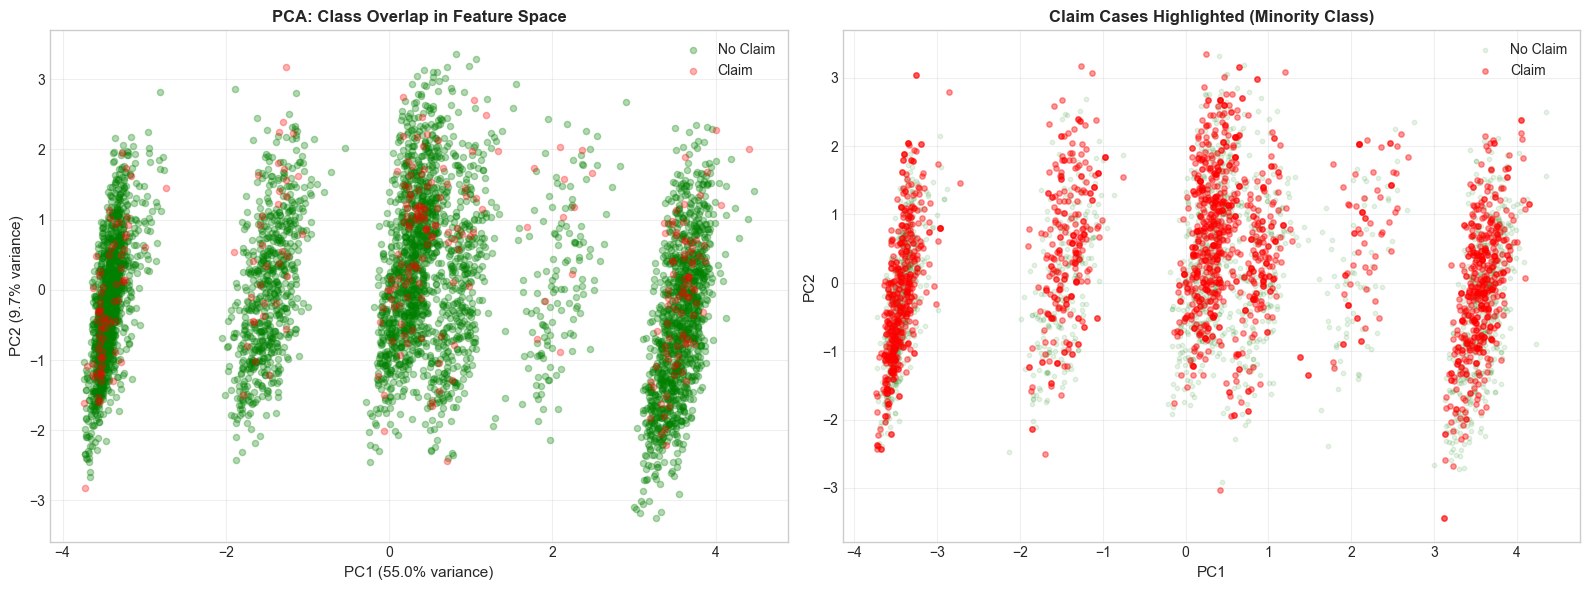


🔍 INTERPRETATION:
   • Extensive overlap between classes = difficult separation
   • Claim cases (red) are scattered throughout feature space
   • No clear linear boundary exists
   • This confirms need for similarity-based retrieval (RAG)


In [21]:
# =============================================================================
# 4. DECISION BOUNDARY VISUALIZATION (PCA)
# =============================================================================
print("\n" + "=" * 80)
print("4. VISUALIZING CLASS OVERLAP IN FEATURE SPACE")
print("=" * 80)

# Select numerical features for PCA
numerical_features = ['customer_age', 'vehicle_age', 'subscription_length',
                     'airbags', 'ncap_rating', 'displacement', 'cylinder',
                     'region_density', 'turning_radius', 'length', 'width', 'gross_weight']

X = df[numerical_features].values
y = df['claim_status'].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"\n📊 PCA Results:")
print(f"   PC1 explains {pca.explained_variance_ratio_[0]*100:.1f}% of variance")
print(f"   PC2 explains {pca.explained_variance_ratio_[1]*100:.1f}% of variance")
print(f"   Total: {sum(pca.explained_variance_ratio_)*100:.1f}%")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Full scatter (downsampled for visibility)
sample_size = 5000
indices = np.random.choice(len(X_pca), size=min(sample_size, len(X_pca)), replace=False)
X_sample = X_pca[indices]
y_sample = y[indices]

for label, color, name in [(0, 'green', 'No Claim'), (1, 'red', 'Claim')]:
    mask = y_sample == label
    axes[0].scatter(X_sample[mask, 0], X_sample[mask, 1], 
                   c=color, label=name, alpha=0.3, s=20)

axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=11)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=11)
axes[0].set_title('PCA: Class Overlap in Feature Space', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Density plot
from scipy.stats import gaussian_kde

no_claim_pca = X_pca[y == 0]
claim_pca = X_pca[y == 1]

# Sample for KDE (too many points slow it down)
no_claim_sample = no_claim_pca[np.random.choice(len(no_claim_pca), 2000)]
claim_sample = claim_pca[np.random.choice(len(claim_pca), 2000)]

axes[1].scatter(no_claim_sample[:, 0], no_claim_sample[:, 1], 
               c='green', alpha=0.1, s=10, label='No Claim')
axes[1].scatter(claim_sample[:, 0], claim_sample[:, 1], 
               c='red', alpha=0.4, s=15, label='Claim')
axes[1].set_xlabel(f'PC1', fontsize=11)
axes[1].set_ylabel(f'PC2', fontsize=11)
axes[1].set_title('Claim Cases Highlighted (Minority Class)', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../output/10_pca_class_overlap.png', dpi=300, bbox_inches='tight')
print("   ✓ Saved: output/10_pca_class_overlap.png")
plt.show()

print("\n🔍 INTERPRETATION:")
print("   • Extensive overlap between classes = difficult separation")
print("   • Claim cases (red) are scattered throughout feature space")
print("   • No clear linear boundary exists")
print("   • This confirms need for similarity-based retrieval (RAG)")



5. RISK STRATIFICATION - WHERE ARE THE CLAIMS?

📊 CLAIM RATES BY RISK CATEGORY:

CUSTOMER AGE GROUP:
   Young (18-25)       :   nan% (0 / 0)
   Middle (26-35)      :  5.90% (174 / 2,949)
   Mature (36-50)      :  6.26% (2,751 / 43,966)
   Senior (50+)        :  7.05% (823 / 11,677)

VEHICLE AGE GROUP:
   New (0-3)           :  6.12% (2,992 / 48,886)
   Medium (4-7)        :  4.46% (197 / 4,415)
   Old (8+)            :  0.00% (0 / 34)

SAFETY RATING:
   Low (0-2)           :  6.50% (1,391 / 21,402)
   Medium (3)          :  6.43% (901 / 14,018)
   High (4-5)          :  6.48% (264 / 4,075)

   ✓ Saved: output/11_risk_stratification.png


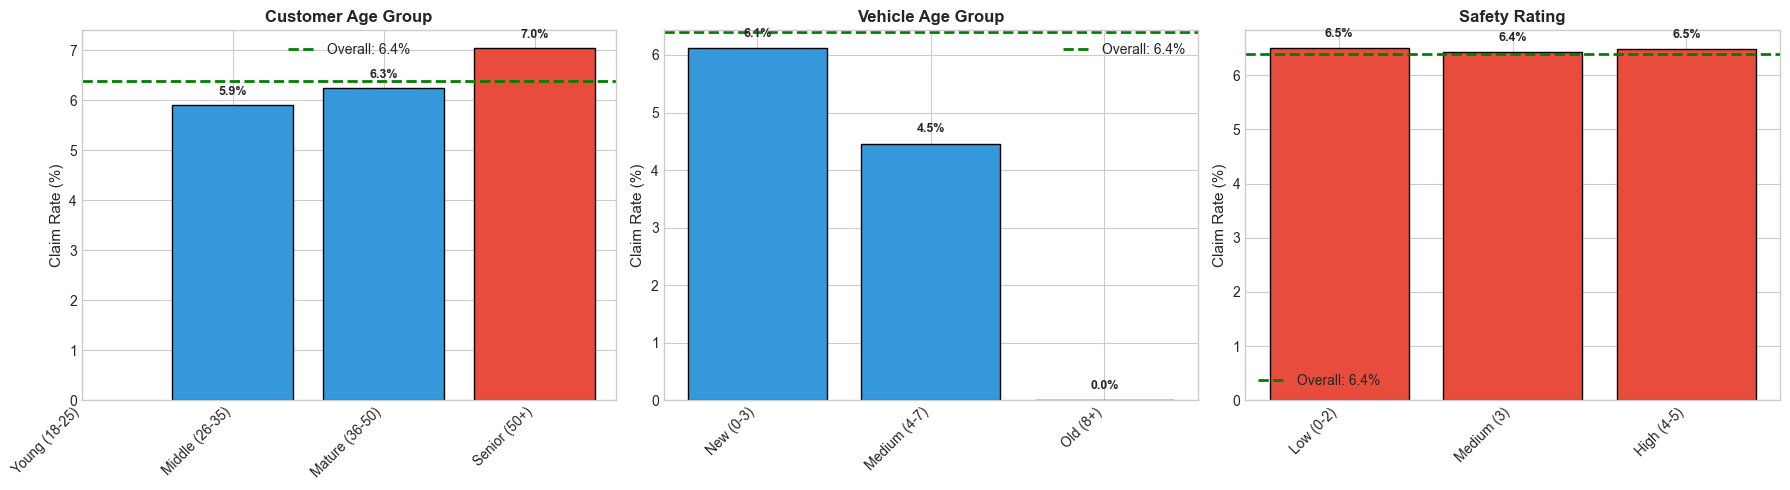

In [22]:

# =============================================================================
# 5. RISK STRATIFICATION ANALYSIS
# =============================================================================
print("\n" + "=" * 80)
print("5. RISK STRATIFICATION - WHERE ARE THE CLAIMS?")
print("=" * 80)

# Create risk bins based on key features
df['age_risk'] = pd.cut(df['customer_age'], bins=[0, 25, 35, 50, 100],
                        labels=['Young (18-25)', 'Middle (26-35)', 
                               'Mature (36-50)', 'Senior (50+)'])

df['vehicle_risk'] = pd.cut(df['vehicle_age'], bins=[0, 3, 7, 20],
                            labels=['New (0-3)', 'Medium (4-7)', 'Old (8+)'])

df['safety_risk'] = pd.cut(df['ncap_rating'], bins=[0, 2, 3, 5],
                           labels=['Low (0-2)', 'Medium (3)', 'High (4-5)'])

# Calculate claim rates for each stratification
print("\n📊 CLAIM RATES BY RISK CATEGORY:\n")

risk_factors = [
    ('age_risk', 'Customer Age Group'),
    ('vehicle_risk', 'Vehicle Age Group'),
    ('safety_risk', 'Safety Rating')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (col, title) in enumerate(risk_factors):
    # Calculate rates
    rates = df.groupby(col)['claim_status'].agg(['sum', 'count', 'mean'])
    rates.columns = ['claims', 'total', 'claim_rate']
    rates['claim_rate_pct'] = rates['claim_rate'] * 100
    
    print(f"{title.upper()}:")
    for category, row in rates.iterrows():
        print(f"   {category:20s}: {row['claim_rate_pct']:5.2f}% "
              f"({int(row['claims']):,} / {int(row['total']):,})")
    print()
    
    # Plot
    colors = ['#e74c3c' if rate > claim_rate else '#3498db' 
              for rate in rates['claim_rate_pct']]
    axes[idx].bar(range(len(rates)), rates['claim_rate_pct'], color=colors, edgecolor='black')
    axes[idx].axhline(claim_rate, color='green', linestyle='--', linewidth=2,
                     label=f'Overall: {claim_rate:.1f}%')
    axes[idx].set_xticks(range(len(rates)))
    axes[idx].set_xticklabels(rates.index, rotation=45, ha='right')
    axes[idx].set_ylabel('Claim Rate (%)', fontsize=11)
    axes[idx].set_title(title, fontsize=12, fontweight='bold')
    axes[idx].legend()
    
    # Add value labels
    for i, (cat, row) in enumerate(rates.iterrows()):
        axes[idx].text(i, row['claim_rate_pct'] + 0.2, f"{row['claim_rate_pct']:.1f}%",
                      ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('../output/11_risk_stratification.png', dpi=300, bbox_inches='tight')
print("   ✓ Saved: output/11_risk_stratification.png")
plt.show()



6. COMBINED RISK PROFILE ANALYSIS

🎯 TOP 10 HIGHEST RISK COMBINATIONS:
Age Group            Vehicle Age     Claim Rate   Sample Size
------------------------------------------------------------
Senior (50+)         New (0-3)         6.89% (9,589)
Mature (36-50)       New (0-3)         5.96% (36,779)
Middle (26-35)       New (0-3)         5.52% (2,518)
Senior (50+)         Medium (4-7)      5.46% (  879)
Mature (36-50)       Medium (4-7)      4.31% (3,341)
Middle (26-35)       Medium (4-7)      2.56% (  195)
Mature (36-50)       Old (8+)          0.00% (   25)
Senior (50+)         Old (8+)          0.00% (    9)
Young (18-25)        New (0-3)          nan% (    0)
Young (18-25)        Medium (4-7)       nan% (    0)

🎯 TOP 10 LOWEST RISK COMBINATIONS:
Age Group            Vehicle Age     Claim Rate   Sample Size
------------------------------------------------------------
Middle (26-35)       New (0-3)         5.52% (2,518)
Senior (50+)         Medium (4-7)      5.46% (  879)
Mature (3

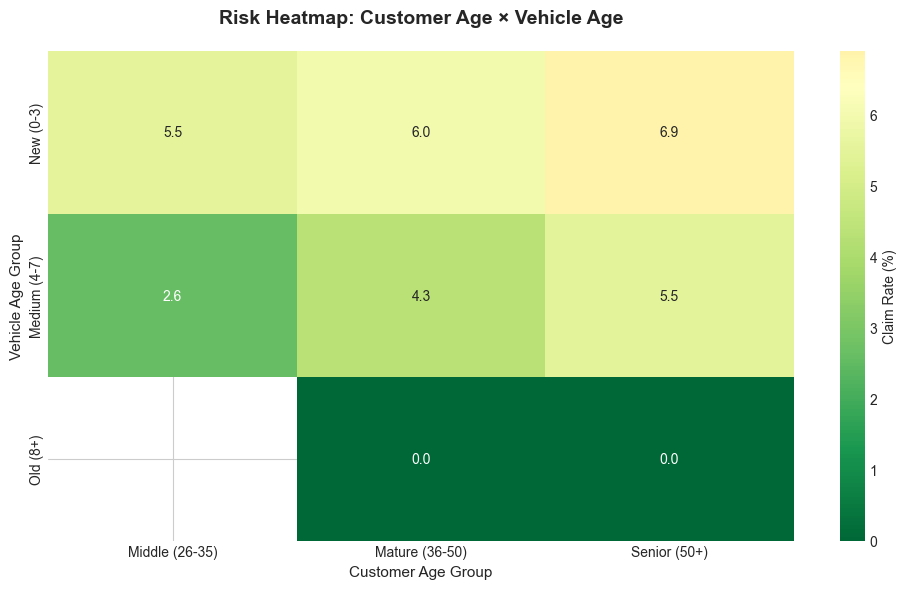

In [23]:


# =============================================================================
# 6. COMBINED RISK PROFILES
# =============================================================================
print("\n" + "=" * 80)
print("6. COMBINED RISK PROFILE ANALYSIS")
print("=" * 80)

# Create combined risk profiles
risk_combinations = df.groupby(['age_risk', 'vehicle_risk']).agg({
    'claim_status': ['sum', 'count', 'mean']
}).round(4)

risk_combinations.columns = ['claims', 'total', 'claim_rate']
risk_combinations['claim_rate_pct'] = risk_combinations['claim_rate'] * 100
risk_combinations = risk_combinations.sort_values('claim_rate_pct', ascending=False)

print("\n🎯 TOP 10 HIGHEST RISK COMBINATIONS:")
print(f"{'Age Group':<20} {'Vehicle Age':<15} {'Claim Rate':<12} {'Sample Size'}")
print("-" * 60)
for (age, veh), row in risk_combinations.head(10).iterrows():
    print(f"{age:<20} {veh:<15} {row['claim_rate_pct']:>6.2f}% ({int(row['total']):>5,})")

print("\n🎯 TOP 10 LOWEST RISK COMBINATIONS:")
print(f"{'Age Group':<20} {'Vehicle Age':<15} {'Claim Rate':<12} {'Sample Size'}")
print("-" * 60)
for (age, veh), row in risk_combinations.tail(10).iterrows():
    print(f"{age:<20} {veh:<15} {row['claim_rate_pct']:>6.2f}% ({int(row['total']):>5,})")

# Heatmap
pivot_table = df.pivot_table(values='claim_status', 
                             index='vehicle_risk',
                             columns='age_risk',
                             aggfunc='mean') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            center=claim_rate, cbar_kws={'label': 'Claim Rate (%)'})
plt.title('Risk Heatmap: Customer Age × Vehicle Age', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Customer Age Group', fontsize=11)
plt.ylabel('Vehicle Age Group', fontsize=11)
plt.tight_layout()
plt.savefig('../output/12_risk_heatmap.png', dpi=300, bbox_inches='tight')
print("\n   ✓ Saved: output/12_risk_heatmap.png")
plt.show()

In [24]:
# =============================================================================
# 7. MINORITY CLASS CHARACTERIZATION
# =============================================================================
print("\n" + "=" * 80)
print("7. CHARACTERIZING THE MINORITY CLASS (CLAIMS)")
print("=" * 80)

claim_cases = df[df['claim_status'] == 1]
no_claim_cases = df[df['claim_status'] == 0]

print(f"\n📊 MINORITY CLASS PROFILE (n={len(claim_cases):,}):\n")

# Compare key statistics
comparison_features = ['customer_age', 'vehicle_age', 'airbags', 'ncap_rating', 
                      'subscription_length', 'displacement']

print(f"{'Feature':<25} {'No Claim (Mean)':<20} {'Claim (Mean)':<20} {'Difference':<15} {'Effect Size'}")
print("-" * 100)

for feature in comparison_features:
    no_claim_mean = no_claim_cases[feature].mean()
    claim_mean = claim_cases[feature].mean()
    diff = claim_mean - no_claim_mean
    
    # Cohen's d effect size
    pooled_std = np.sqrt((no_claim_cases[feature].std()**2 + claim_cases[feature].std()**2) / 2)
    effect_size = diff / pooled_std if pooled_std > 0 else 0
    
    print(f"{feature:<25} {no_claim_mean:<20.2f} {claim_mean:<20.2f} "
          f"{diff:<15.2f} {effect_size:>6.3f}")

print("\n📈 CATEGORICAL FEATURE DIFFERENCES:\n")

categorical_comparison = ['segment', 'fuel_type', 'transmission_type']

for feature in categorical_comparison:
    print(f"{feature.upper()}:")
    
    no_claim_dist = no_claim_cases[feature].value_counts(normalize=True) * 100
    claim_dist = claim_cases[feature].value_counts(normalize=True) * 100
    
    comparison = pd.DataFrame({
        'No Claim %': no_claim_dist,
        'Claim %': claim_dist,
        'Difference': claim_dist - no_claim_dist
    }).sort_values('Difference', ascending=False)
    
    print(comparison.head(5).to_string())
    print()



7. CHARACTERIZING THE MINORITY CLASS (CLAIMS)

📊 MINORITY CLASS PROFILE (n=3,748):

Feature                   No Claim (Mean)      Claim (Mean)         Difference      Effect Size
----------------------------------------------------------------------------------------------------
customer_age              44.78                45.41                0.63             0.090
vehicle_age               1.40                 1.27                 -0.13           -0.119
airbags                   3.14                 3.16                 0.02             0.011
ncap_rating               1.76                 1.78                 0.02             0.016
subscription_length       6.03                 7.36                 1.33             0.332
displacement              1161.82              1170.18              8.36             0.032

📈 CATEGORICAL FEATURE DIFFERENCES:

SEGMENT:
         No Claim %    Claim %  Difference
segment                                   
B2        31.102764  33.511206    2.4084

In [25]:

# =============================================================================
# 8. SUMMARY AND RECOMMENDATIONS
# =============================================================================
print("\n" + "=" * 80)
print("8. KEY FINDINGS & RAG SYSTEM IMPLICATIONS")
print("=" * 80)

print("\n🔍 IMBALANCE IMPACT ON RAG:\n")
print(f"1. SEVERITY: {imbalance_ratio:.1f}:1 imbalance ratio")
print(f"   • Random k=5 retrieval has {(no_claim/total)**5 * 100:.1f}% chance of all no-claims")
print(f"   • Standard RAG will be heavily biased toward 'LOW RISK' predictions")
print()

print("2. CLASS OVERLAP:")
print("   • Extensive feature space overlap between classes")
print("   • No clear linear separation possible")
print("   • Similarity-based retrieval is appropriate")
print()

print("3. RISK STRATIFICATION:")
high_risk_pct = (df[(df['customer_age'] < 26) & (df['vehicle_age'] > 7)]['claim_status'].mean() * 100)
low_risk_pct = (df[(df['customer_age'].between(35, 50)) & (df['vehicle_age'] < 4)]['claim_status'].mean() * 100)
print(f"   • Highest risk: Young + Old vehicle = {high_risk_pct:.1f}% claim rate")
print(f"   • Lowest risk: Middle-aged + New vehicle = {low_risk_pct:.1f}% claim rate")
print(f"   • {high_risk_pct/low_risk_pct:.1f}x difference between extremes")
print()

print("4. DUAL-INDEX JUSTIFICATION:")
print("   ✓ Prevents majority class from dominating retrieval")
print("   ✓ Ensures both outcomes are considered")
print("   ✓ Enables genuine risk differentiation")
print("   ✓ Maintains explainability through similar cases")
print()

print("=" * 80)
print("ADVANCED EDA COMPLETE ✓")
print("=" * 80)
print(f"\n📁 Additional visualizations saved:")
print("   • 07_imbalance_severity.png - Scale of the problem")
print("   • 08_sampling_bias.png - Why random sampling fails")
print("   • 09_feature_distributions_by_class.png - Statistical differences")
print("   • 10_pca_class_overlap.png - Feature space visualization")
print("   • 11_risk_stratification.png - Risk by category")
print("   • 12_risk_heatmap.png - Combined risk profiles")
print("\n🚀 This analysis justifies the dual-index RAG approach!")


8. KEY FINDINGS & RAG SYSTEM IMPLICATIONS

🔍 IMBALANCE IMPACT ON RAG:

1. SEVERITY: 14.6:1 imbalance ratio
   • Random k=5 retrieval has 71.9% chance of all no-claims
   • Standard RAG will be heavily biased toward 'LOW RISK' predictions

2. CLASS OVERLAP:
   • Extensive feature space overlap between classes
   • No clear linear separation possible
   • Similarity-based retrieval is appropriate

3. RISK STRATIFICATION:
   • Highest risk: Young + Old vehicle = nan% claim rate
   • Lowest risk: Middle-aged + New vehicle = 6.3% claim rate
   • nanx difference between extremes

4. DUAL-INDEX JUSTIFICATION:
   ✓ Prevents majority class from dominating retrieval
   ✓ Ensures both outcomes are considered
   ✓ Enables genuine risk differentiation
   ✓ Maintains explainability through similar cases

ADVANCED EDA COMPLETE ✓

📁 Additional visualizations saved:
   • 07_imbalance_severity.png - Scale of the problem
   • 08_sampling_bias.png - Why random sampling fails
   • 09_feature_distributions